# Assignment A4.3 - Parking Estimation
_Subject,_ **Artificial Intelligence**  
_Topic,_ **Machine Learning**  
_Subtopic,_ **Supervised Machine Learning: Regression**  

### Resources
- [Presentation Slides](https://datsoftlyngby.github.io/soft2020spring/resources/5e3991f4-ML2004.pdf)
- [Data file at GitHub](https://github.com/datsoftlyngby/soft2020spring-AI/blob/master/docs/data/parking-estimation.xlsx)
- [Youtube Tutorial](https://www.youtube.com/watch?v=J_LnPL3Qg70)

### Content
_only works in jupyter notebooks_
- [Prepare Enviroment](#Prepare-Enviroment)
- [Prepare Data](#Prepare-Data)
- [Preprocess Data](#Preprocess-Data)
- [Regression Model](#Regression-Model)

### Assignment
...

## Regression
---

### Differents between Discrete and Continuous

**Classification** predicts and _class_, like gender, color and object.  
It is based on discrete values, meaning the values are finite and countable. 

**Regression** predicts a _value_, like size, income and time.  
It is based on continuous values, meaning the values can be infite and not countable.  
The digits in **π** are continuous, this is because **π** contains are infite amount of digits.

It is possible to change classification to value and vice verca.  
A classification can be changed to a continuous value, by finding a numeric representation. This could be a city based on citizens.  
To change a continuous value to classification, intervals could be used. Speed could be divided into the categories (still, slow, advised, fast).

_[reference, statisticshowto | Discrete vs Continuous variables: How to Tell the Difference](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/statistics-definitions/discrete-vs-continuous-variables/)_

### Mathematical representation
...

#### Slope and Intercept

### Model Validation

#### Loss function

Min sum(|errors|)  
Min sum(|errors|2)


## Prepare Environment
---

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import linear_model

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# For serialization and deserialization of data from/to file
import pickle

In [2]:
# import numpy as np
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import metrics as sm

## Prepare Data
---

### Reading xlsx file
...

In [3]:
# Input file containing data
file_path = 'data-assets/parking-estimation.xlsx'
df = pd.read_excel(file_path)
df.head()

,Unnamed: 0,Demand estimation using linear regression,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Y,X1,X2,X3,X4
2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50


### Defining colunms
...

In [4]:
# Define columns
df.columns = df.iloc[2]
df.head()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Y,X1,X2,X3,X4
2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50


### Remove unneedded rows
...

In [5]:
# Remove unnedded rows
df = df.drop(df.index[0:3])
df.head()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
3,1,192000,15,1800000,5800,50
4,2,190400,15,1790000,6200,50
5,3,191200,15,1780000,6400,60
6,4,177600,25,1778000,6500,60
7,5,176800,25,1750000,6550,60


### Not Documented
...

In [6]:
df.tail()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
26,24,123888,98,1595000,15200,175
27,25,126080,87,1590000,15600,175
28,26,151680,77,1600000,16000,190
29,27,152800,63,1610000,16200,200
30,average,160026,49.9259,NaN,NaN,NaN


### Not Documented
...

In [7]:
# Remove average row
df = df.drop(df.index[-1])
df.tail()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
25,23,126240,86,1590000,15000,165
26,24,123888,98,1595000,15200,175
27,25,126080,87,1590000,15600,175
28,26,151680,77,1600000,16000,190
29,27,152800,63,1610000,16200,200


### Not Documented
...

In [8]:
df.describe()

2,City,Number of weekly riders,Price per week,Population of city,Monthly income of riders,Average parking rates per month
count,27,27,27,27,27,27
unique,27,26,13,23,27,17
top,27,161600,40,1590000,14010,75
freq,1,2,5,2,1,3


### Not Documented
...

In [9]:
# Displays the attribute labels
list(df)

['City ',
 'Number of weekly riders',
 'Price per week',
 'Population of city',
 'Monthly income of riders',
 'Average parking rates per month']

### Not Documented
...

In [10]:
df = df.apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 3 to 29
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   City                             27 non-null     int64
 1   Number of weekly riders          27 non-null     int64
 2   Price per week                   27 non-null     int64
 3   Population of city               27 non-null     int64
 4   Monthly income of riders         27 non-null     int64
 5   Average parking rates per month  27 non-null     int64
dtypes: int64(6)
memory usage: 1.5 KB


### Features Scaling Normalisation
adjusting the values measured on different scales to a notionally common scale.  
for example, all values go into the range $[0, 1]$ or $[-1, 1]$

In [11]:
#for value in list(df)[:-1]:
#    df[value] /= df[value].max()

#df.head()

## Correlation Coefficient

| Correlation | Desciption                                               |
|-------------|----------------------------------------------------------|
| ${–1}$        | A perfect negative (downward sloping) linear relationship|
| ${–0.70}$     | A strong negative (downward sloping) linear relationship |
| ${–0.50}$     | A moderate negative (downhill sloping) relationship      |
| ${–0.30}$     | A weak negative (downhill sloping) linear relationship   |
| $\pm0.0$         | No linear relationship                                   |
| $+0.30$     | A weak positive (upward sloping) linear relationship     |
| $+0.50$     | A moderate positive (upward sloping) linear relationship |
| $+0.70$     | A strong positive (upward sloping) linear relationship   |
| $+1$        | A perfect positive (upward sloping) linear relationship  |

_[reference, investopedia | What Does a Negative Correlation Coefficient Mean?](https://www.investopedia.com/ask/answers/041015/what-does-negative-correlation-coefficient-mean.asp)_

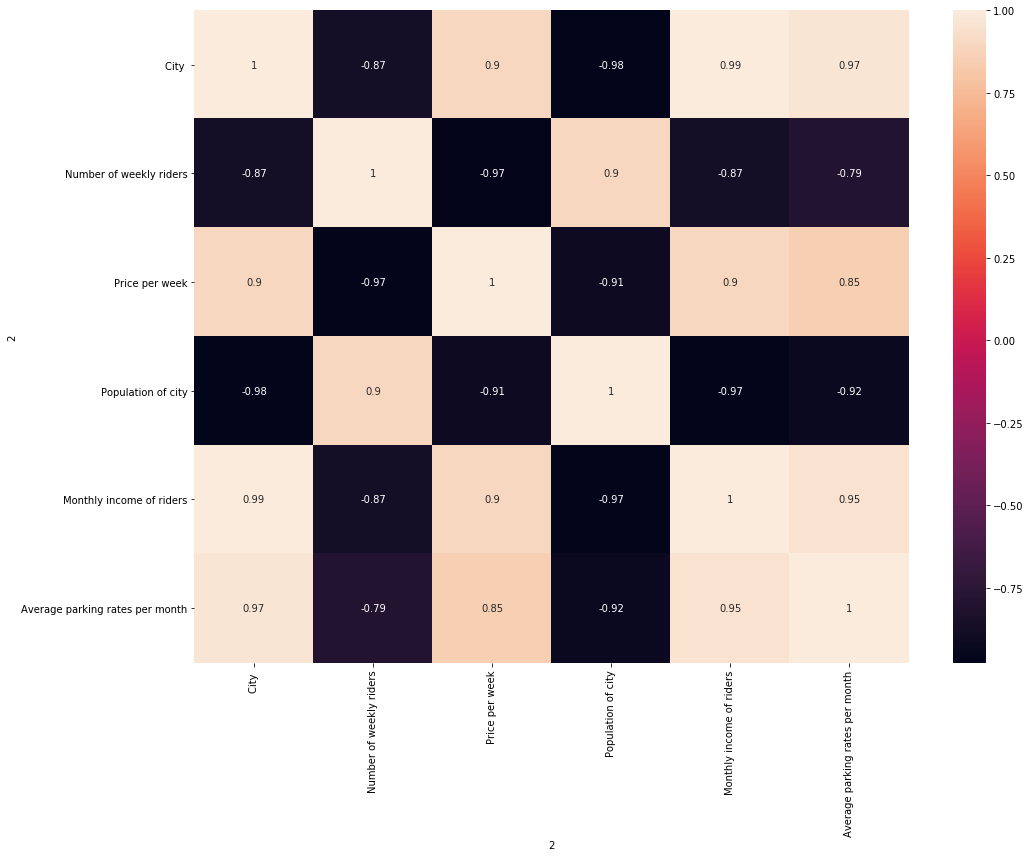

In [12]:
corr_matrix = df.corr()
corr_matrix

# plot the matrix as a heat map
plt.subplots(figsize = (16, 12))
sns.heatmap(corr_matrix, annot=True)

In [13]:
# df = df.drop(columns=['Number of weekly riders', 'Price per week', 'Population of city', 'Monthly income of riders'])

# corr_matrix = df.corr()
# corr_matrix

# plot the matrix as a heat map
# plt.subplots(figsize = (16, 12))
# sns.heatmap(corr_matrix, annot=True)

## Preprocess Data

### Not Documented
...

In [14]:
# split the set into subsets for training and testing
train_data, test_data = train_test_split(df, train_size =0.8, random_state = 3)

### Not Documented
...

In [15]:
targets = list(df)

x_train = train_data[targets[:-1]]
y_train = train_data[targets[-1]]

x_test = test_data[targets[:-1]]
y_test = test_data[targets[-1]]

## Regression Model
---

### Train Model
...

In [16]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Model Accuracy
...

In [17]:
score = regressor.score(x_test, y_test)
score

0.7559728933080729

### Test Model
...

In [21]:
test_data = [2, 190400, 15, 1790000, 6200] # 50
prediction = regressor.predict([test_data])
prediction

array([46.56512168])

### Store Model
...

In [22]:
reg_model_file = './models/regressor.pkl'

with open(reg_model_file, 'wb') as f:
    pickle.dump(regressor, f)

### Use Preloaded Model
...

In [24]:
# To load it later for reuse
with open(reg_model_file, 'rb') as f:
    regressor_model = pickle.load(f)

# Test reading from the file
my_prediction = regressor_model.predict([[5, 176800, 25, 1750000, 6550]]) # 5	176800	25	1750000	6550	60
print(my_prediction)

[63.30194587]
